# 🖼 AI Image Generator - Replicate API

## 📌 Descripción
Este notebook utiliza la API de **Replicate** para generar imágenes a partir de descripciones en texto (*prompts*).

In [88]:
!pip install replicate requests pillow matplotlib --quiet

## 2. Importar todo lo necesario para el proyecto

In [89]:
import os
import replicate
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


## 3. Proyecto


## 🔑 Autenticación con la API de Replicate
Pedimos la API Key del usuario y la almacenamos como una variable de entorno para seguridad.

In [ ]:
REPLICATE_API_TOKEN = input("🔑 Introduce tu Replicate API Token: ")
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

## 🤖 Configuración del Modelo de IA
Definimos el modelo de generación de imágenes que se usará en Replicate.

In [ ]:
MODEL_NAME = "alexrs97/project07-image-generator"
VERSION_ID = "2c869b45091b36dcb2c4fdf321d03330feaae8ad216a111bc7d69ed4936ce077"

## 📝 Lista de Prompts
Cada prompt describe una escena única para generar imágenes.

In [91]:
prompts = [
    "A TOKalxrs07 mighty warrior wields a mystical hammer, summoning lightning from the stormy sky...",
    "A TOKalxrs07 brave Gryffindor wizard stands tall in the middle of the Hogwarts castle courtyard...",
    "A TOKalxrs07 powerful superhero stands atop a burning skyscraper, his futuristic armor glowing..."
]

## ⚙️ Configuración de Parámetros
Ajustamos los parámetros de calidad y formato de la imagen.

In [92]:
image_params = {
    "num_inference_steps": 35,
    "go_fast": False,
    "lora_scale": 1,
    "megapixels": "1",
    "num_outputs": 1,
    "aspect_ratio": "1:1",
    "output_format": "webp",
    "guidance_scale": 3,
    "output_quality": 80,
    "prompt_strength": 0.8,
    "extra_lora_scale": 1,
}


In [93]:
image_urls = []

## 🖼 Generación de Imágenes
Recorremos los prompts y usamos la API de Replicate para generar imágenes.

In [94]:
for idx, prompt in enumerate(prompts):
    print(f"🖼 Generando imagen {idx + 1}/{len(prompts)}...")
    try:
        output = replicate.run(
            f"{MODEL_NAME}:{VERSION_ID}",
            input={"prompt": prompt, **image_params}
        )
        if output:
            image_urls.append(output[0])
            print(f"✅ Imagen {idx + 1} generada: {output[0]}")
        else:
            print(f"⚠ No se generó ninguna imagen para el prompt {idx + 1}.")
    except Exception as e:
        print(f"❌ Error al generar la imagen {idx + 1}: {e}")


🖼 Generando imagen 1/3...
✅ Imagen 1 generada: https://replicate.delivery/xezq/oDa80wcprZYqKdtoe2RZ2Pergze44i0AhAEBUCZueCs1EARRB/out-0.webp
🖼 Generando imagen 2/3...
✅ Imagen 2 generada: https://replicate.delivery/xezq/D7TLHsRh4KrxLd35XwK11mO67AVTYM2DArDXGgKfSKnrAIKKA/out-0.webp
🖼 Generando imagen 3/3...
✅ Imagen 3 generada: https://replicate.delivery/xezq/fjz6f1mshtns7UbjzVAi1h46fPFNwZp9rajIUIdJhfOAGARRB/out-0.webp


## 🖥️ Visualización y Guardado de Imágenes
Descargamos, mostramos y guardamos las imágenes generadas.

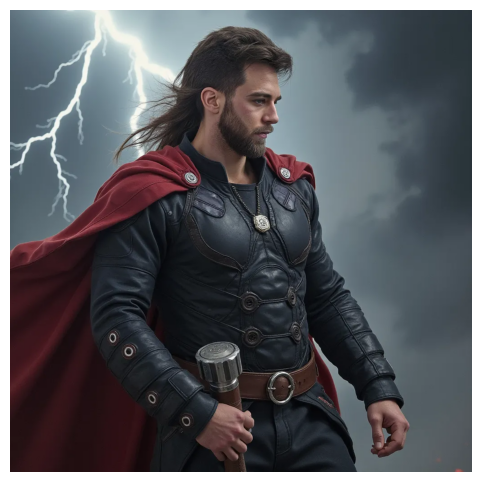

✅ Imagen guardada como 'imagen_generada_1.png'


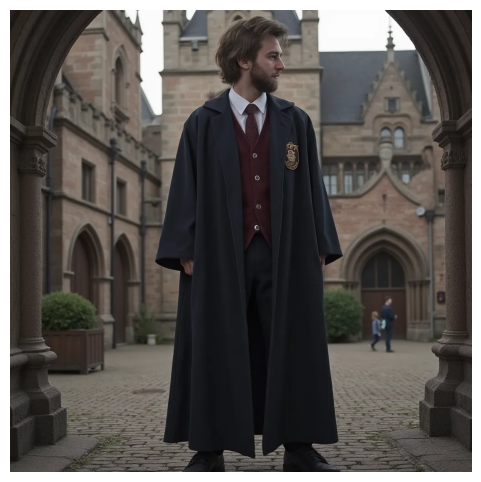

✅ Imagen guardada como 'imagen_generada_2.png'


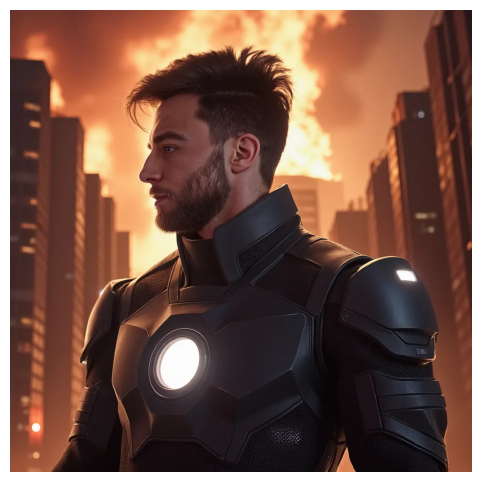

✅ Imagen guardada como 'imagen_generada_3.png'


In [95]:
if image_urls:
    for idx, img_url in enumerate(image_urls):
        response = requests.get(img_url)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))

            # Mostrar imagen en el notebook
            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.axis("off")
            plt.show()

            # Guardar imagen con un nombre único
            image_filename = f"imagen_generada_{idx + 1}.png"
            image.save(image_filename)
            print(f"✅ Imagen guardada como '{image_filename}'")
        else:
            print(f"❌ No se pudo descargar la imagen {idx + 1}.")
else:
    print("⚠ No se generaron imágenes.")